In [609]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. real GDP

In [610]:
real_gdp=pd.read_csv('GDPC1.csv', index_col=0, parse_dates=True)

In [611]:
real_gdp

,VALUE
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2020-01-01,19010.848
2020-04-01,17302.511
2020-07-01,18596.521


real investment

In [613]:
real_INS_raw=pd.read_csv('GPDIC1.csv', parse_dates=['DATE'])

In [614]:
real_ins = (
    real_INS_raw
    .reset_index()
    .pivot_table(index="DATE", values='GPDIC1')
)

real_ins

,GPDIC1
DATE,
1947-01-01,218.091
1947-04-01,201.386
1947-07-01,195.461
1947-10-01,233.284
1948-01-01,257.220
...,...
2020-01-01,3333.963
2020-04-01,2849.792
2020-07-01,3329.625


real consumption

In [615]:
real_C_raw=pd.read_csv('PCEC96.csv', parse_dates=['DATE'])

In [616]:
real_C = (
    real_C_raw
    .reset_index()
    .pivot_table(index="DATE", values='PCEC96')
)

real_C

,PCEC96
DATE,
2002-01-01,8981.7
2002-02-01,9022.0
2002-03-01,9020.6
2002-04-01,9066.3
2002-05-01,9031.8
...,...
2020-12-01,12890.7
2021-01-01,13285.2
2021-02-01,13117.5


2. merge three DataFrames

In [617]:
combine1=pd.merge(real_gdp, real_ins, on = 'DATE')

In [618]:
combine1

,VALUE,GPDIC1
DATE,,
1947-01-01,2033.061,218.091
1947-04-01,2027.639,201.386
1947-07-01,2023.452,195.461
1947-10-01,2055.103,233.284
1948-01-01,2086.017,257.220
...,...,...
2020-01-01,19010.848,3333.963
2020-04-01,17302.511,2849.792
2020-07-01,18596.521,3329.625


In [619]:
data=pd.merge(combine1, real_C, on='DATE', how='left')

In [620]:
data

,VALUE,GPDIC1,PCEC96
DATE,,,
1947-01-01,2033.061,218.091,NaN
1947-04-01,2027.639,201.386,NaN
1947-07-01,2023.452,195.461,NaN
1947-10-01,2055.103,233.284,NaN
1948-01-01,2086.017,257.220,NaN
...,...,...,...
2020-01-01,19010.848,3333.963,13416.7
2020-04-01,17302.511,2849.792,10999.3
2020-07-01,18596.521,3329.625,12799.0


In [621]:
names={'VALUE':'real GDP',
      'GPDIC1':'real investment',
       'PCEC96': 'real consumption'
      }
data.rename(columns=names, inplace=True)

In [622]:
data

,real GDP,real investment,real consumption
DATE,,,
1947-01-01,2033.061,218.091,NaN
1947-04-01,2027.639,201.386,NaN
1947-07-01,2023.452,195.461,NaN
1947-10-01,2055.103,233.284,NaN
1948-01-01,2086.017,257.220,NaN
...,...,...,...
2020-01-01,19010.848,3333.963,13416.7
2020-04-01,17302.511,2849.792,10999.3
2020-07-01,18596.521,3329.625,12799.0


4.1 data between 2000-2009

In [623]:
new= data.loc['2000':'2009']

In [624]:
new

,real GDP,real investment,real consumption
DATE,,,
2000-01-01,12924.179,2257.109,NaN
2000-04-01,13160.842,2390.733,NaN
2000-07-01,13178.419,2367.274,NaN
2000-10-01,13260.506,2371.809,NaN
2001-01-01,13222.690,2264.202,NaN
2001-04-01,13299.984,2267.433,NaN
2001-07-01,13244.784,2218.370,NaN
2001-10-01,13280.859,2108.500,NaN
2002-01-01,13397.002,2170.707,8981.7


4.2 growth rate

In [625]:
r=new.pct_change()

In [626]:
r

,real GDP,real investment,real consumption
DATE,,,
2000-01-01,NaN,NaN,NaN
2000-04-01,0.018312,0.059201,NaN
2000-07-01,0.001336,-0.009812,NaN
2000-10-01,0.006229,0.001916,NaN
2001-01-01,-0.002852,-0.045369,NaN
2001-04-01,0.005846,0.001427,NaN
2001-07-01,-0.004150,-0.021638,NaN
2001-10-01,0.002724,-0.049527,NaN
2002-01-01,0.008745,0.029503,NaN


4.3 which quarter has highest GDP growht rate

In [627]:
def idxmax(x):
    return x.idxmax()

r.agg(idxmax)

real GDP           2000-04-01
real investment    2009-10-01
real consumption   2005-07-01
dtype: datetime64[ns]

In [628]:
r

,real GDP,real investment,real consumption
DATE,,,
2000-01-01,NaN,NaN,NaN
2000-04-01,0.018312,0.059201,NaN
2000-07-01,0.001336,-0.009812,NaN
2000-10-01,0.006229,0.001916,NaN
2001-01-01,-0.002852,-0.045369,NaN
2001-04-01,0.005846,0.001427,NaN
2001-07-01,-0.004150,-0.021638,NaN
2001-10-01,0.002724,-0.049527,NaN
2002-01-01,0.008745,0.029503,NaN


4.4 

In [629]:
def table(r):  
    newr=r.fillna(0)
    return newr.apply(lambda x:'recession' if x<0 else ('normal' if x>0 else 'NaN'))

[reference](https://stackoverflow.com/questions/44991438/lambda-including-if-elif-else)

In [630]:
newR=r.apply(table)
newR

,real GDP,real investment,real consumption
DATE,,,
2000-01-01,NaN,NaN,NaN
2000-04-01,normal,normal,NaN
2000-07-01,normal,recession,NaN
2000-10-01,normal,normal,NaN
2001-01-01,recession,recession,NaN
2001-04-01,normal,normal,NaN
2001-07-01,recession,recession,NaN
2001-10-01,normal,recession,NaN
2002-01-01,normal,normal,NaN


4.5 Boolean selection

In [631]:
r

,real GDP,real investment,real consumption
DATE,,,
2000-01-01,NaN,NaN,NaN
2000-04-01,0.018312,0.059201,NaN
2000-07-01,0.001336,-0.009812,NaN
2000-10-01,0.006229,0.001916,NaN
2001-01-01,-0.002852,-0.045369,NaN
2001-04-01,0.005846,0.001427,NaN
2001-07-01,-0.004150,-0.021638,NaN
2001-10-01,0.002724,-0.049527,NaN
2002-01-01,0.008745,0.029503,NaN


In [632]:
r['real investment']>r['real GDP']

DATE
2000-01-01    False
2000-04-01     True
2000-07-01    False
2000-10-01    False
2001-01-01    False
2001-04-01    False
2001-07-01    False
2001-10-01    False
2002-01-01     True
2002-04-01     True
2002-07-01    False
2002-10-01    False
2003-01-01     True
2003-04-01    False
2003-07-01     True
2003-10-01     True
2004-01-01    False
2004-04-01     True
2004-07-01     True
2004-10-01     True
2005-01-01     True
2005-04-01    False
2005-07-01     True
2005-10-01     True
2006-01-01     True
2006-04-01    False
2006-07-01    False
2006-10-01    False
2007-01-01    False
2007-04-01     True
2007-07-01    False
2007-10-01    False
2008-01-01    False
2008-04-01    False
2008-07-01    False
2008-10-01    False
2009-01-01    False
2009-04-01    False
2009-07-01    False
2009-10-01     True
dtype: bool

In [633]:
r.loc[r['real investment']>r['real GDP']]

,real GDP,real investment,real consumption
DATE,,,
2000-04-01,0.018312,0.059201,NaN
2002-01-01,0.008745,0.029503,NaN
2002-04-01,0.006057,0.016432,0.009419
2003-01-01,0.005548,0.007692,0.009140
2003-07-01,0.016982,0.036438,0.012932
2003-10-01,0.011482,0.033689,0.007707
2004-04-01,0.007621,0.039945,0.006808
2004-07-01,0.009453,0.015514,0.008888
2004-10-01,0.010017,0.020864,0.012028


5-6. two level index
- since I alraedy picked US, now I choose UK as second country

In [634]:
UK_gdp=pd.read_csv('CLVMNACSCAB1GQUK.csv', index_col=0, parse_dates=True)

In [635]:
UK_gdp

,CLVMNACSCAB1GQUK
DATE,
1975-01-01,180405.0
1975-04-01,177442.3
1975-07-01,176835.5
1975-10-01,178863.1
1976-01-01,181693.7
...,...
2019-07-01,473006.0
2019-10-01,473087.6
2020-01-01,458804.7


In [636]:
UK_ins=pd.read_csv('RIVEXUKQ.csv', index_col=0, parse_dates=True)

In [637]:
UK_ins

,RIVEXUKQ
DATE,
1955-01-01,13405
1955-04-01,13746
1955-07-01,14219
1955-10-01,14537
1956-01-01,14713
...,...
2015-10-01,77300
2016-01-01,77320
2016-04-01,77501


In [638]:
UK_C=pd.read_csv('RLCMEXUKQ.csv', index_col=0, parse_dates=True)

In [639]:
UK_C

,RLCMEXUKQ
DATE,
1955-01-01,59966
1955-04-01,60352
1955-07-01,61206
1955-10-01,60799
1956-01-01,60987
...,...
2015-10-01,286348
2016-01-01,288325
2016-04-01,290533


In [640]:
combine2=pd.merge(UK_gdp, UK_ins, on = 'DATE')

In [641]:
UK_data=pd.merge(combine2, UK_C, on='DATE', how='left')

In [642]:
UK_data

,CLVMNACSCAB1GQUK,RIVEXUKQ,RLCMEXUKQ
DATE,,,
1975-01-01,180405.0,36221,103111
1975-04-01,177442.3,36089,103318
1975-07-01,176835.5,35528,102228
1975-10-01,178863.1,34481,101351
1976-01-01,181693.7,36221,102026
...,...,...,...
2015-10-01,447638.7,77300,286348
2016-01-01,448529.7,77320,288325
2016-04-01,450560.2,77501,290533


In [643]:
UK_names={'CLVMNACSCAB1GQUK':'real GDP',
      'RIVEXUKQ':'real investment',
       'RLCMEXUKQ': 'real consumption'
      }
UK_data.rename(columns=UK_names, inplace=True)

In [644]:
UK_data

,real GDP,real investment,real consumption
DATE,,,
1975-01-01,180405.0,36221,103111
1975-04-01,177442.3,36089,103318
1975-07-01,176835.5,35528,102228
1975-10-01,178863.1,34481,101351
1976-01-01,181693.7,36221,102026
...,...,...,...
2015-10-01,447638.7,77300,286348
2016-01-01,448529.7,77320,288325
2016-04-01,450560.2,77501,290533


In [645]:
UK_data['Country'] = ['UK' for i in range(len(UK_data['real GDP']))]

In [646]:
UK_data

,real GDP,real investment,real consumption,Country
DATE,,,,
1975-01-01,180405.0,36221,103111,UK
1975-04-01,177442.3,36089,103318,UK
1975-07-01,176835.5,35528,102228,UK
1975-10-01,178863.1,34481,101351,UK
1976-01-01,181693.7,36221,102026,UK
...,...,...,...,...
2015-10-01,447638.7,77300,286348,UK
2016-01-01,448529.7,77320,288325,UK
2016-04-01,450560.2,77501,290533,UK


In [647]:
data['Country'] = ['US' for i in range(len(data['real GDP']))]

In [648]:
two_data=pd.concat([UK_data, data])

In [649]:
two_data

,real GDP,real investment,real consumption,Country
DATE,,,,
1975-01-01,180405.000,36221.000,103111.0,UK
1975-04-01,177442.300,36089.000,103318.0,UK
1975-07-01,176835.500,35528.000,102228.0,UK
1975-10-01,178863.100,34481.000,101351.0,UK
1976-01-01,181693.700,36221.000,102026.0,UK
...,...,...,...,...
2020-01-01,19010.848,3333.963,13416.7,US
2020-04-01,17302.511,2849.792,10999.3,US
2020-07-01,18596.521,3329.625,12799.0,US


In [650]:
two_data.reset_index(inplace=True)

In [651]:
two_data

,DATE,real GDP,real investment,real consumption,Country
0,1975-01-01,180405.000,36221.000,103111.0,UK
1,1975-04-01,177442.300,36089.000,103318.0,UK
2,1975-07-01,176835.500,35528.000,102228.0,UK
3,1975-10-01,178863.100,34481.000,101351.0,UK
4,1976-01-01,181693.700,36221.000,102026.0,UK
...,...,...,...,...,...
460,2020-01-01,19010.848,3333.963,13416.7,US
461,2020-04-01,17302.511,2849.792,10999.3,US
462,2020-07-01,18596.521,3329.625,12799.0,US
463,2020-10-01,18794.426,3539.863,13095.6,US


In [652]:
two_data.set_index(['Country','DATE'],inplace=True)

In [653]:
two_data

real GDP  real investment  real consumption
Country DATE                                                     
UK      1975-01-01  180405.000        36221.000          103111.0
        1975-04-01  177442.300        36089.000          103318.0
        1975-07-01  176835.500        35528.000          102228.0
        1975-10-01  178863.100        34481.000          101351.0
        1976-01-01  181693.700        36221.000          102026.0
...                        ...              ...               ...
US      2020-01-01   19010.848         3333.963           13416.7
        2020-04-01   17302.511         2849.792           10999.3
        2020-07-01   18596.521         3329.625           12799.0
        2020-10-01   18794.426         3539.863           13095.6
        2021-01-01   19088.064         3497.549           13285.2

[465 rows x 3 columns]

7-8. HP filter

In [654]:
import statsmodels.api as sm

In [655]:
hpcycle, hptrend = sm.tsa.filters.hpfilter(data['real GDP'])

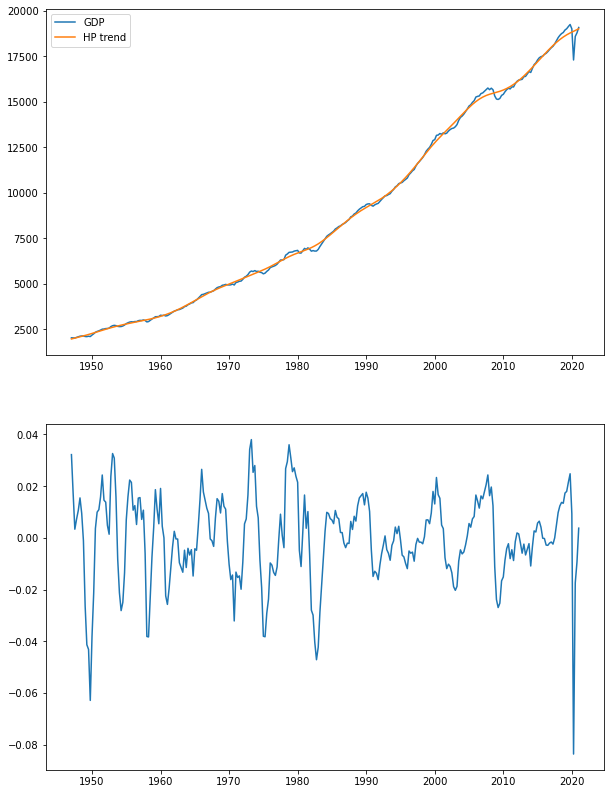

In [656]:
fig, ax = plt.subplots(2,1,figsize=(10,14))
ax[0].plot(data['real GDP'],label='GDP')
ax[0].plot(hptrend,label='HP trend')
ax[0].legend()
ax[1].plot(hpcycle/hptrend,label='cyclical components')
plt.show()

extra

In [657]:
FFR=pd.read_csv('FEDFUNDS.csv', index_col=0, parse_dates=True)

In [658]:
FFR

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2021-01-01,0.09
2021-02-01,0.08
2021-03-01,0.07


In [659]:
real_gdp

,VALUE
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2020-01-01,19010.848
2020-04-01,17302.511
2020-07-01,18596.521


In [660]:
combine3=pd.merge(real_gdp, FFR, on = 'DATE')

In [661]:
combine3

,VALUE,FEDFUNDS
DATE,,
1954-07-01,2682.601,0.80
1954-10-01,2735.091,0.85
1955-01-01,2813.212,1.39
1955-04-01,2858.988,1.43
1955-07-01,2897.598,1.68
...,...,...
2020-01-01,19010.848,1.55
2020-04-01,17302.511,0.05
2020-07-01,18596.521,0.09


In [665]:
corr=combine3.replace(0, np.NaN).dropna(axis=1).corr()

In [669]:
corr

,VALUE,FEDFUNDS
VALUE,1.000000,-0.409933
FEDFUNDS,-0.409933,1.000000


In [670]:
combine3.shift(90)

,VALUE,FEDFUNDS
DATE,,
1954-07-01,NaN,NaN
1954-10-01,NaN,NaN
1955-01-01,NaN,NaN
1955-04-01,NaN,NaN
1955-07-01,NaN,NaN
...,...,...
2020-01-01,11615.636,5.52
2020-04-01,11715.393,5.50
2020-07-01,11832.486,5.56


In [671]:
combine3.shift(-90)

,VALUE,FEDFUNDS
DATE,,
1954-07-01,6079.494,4.61
1954-10-01,6197.686,4.73
1955-01-01,6309.514,5.42
1955-04-01,6309.652,6.47
1955-07-01,6329.791,6.70
...,...,...
2020-01-01,NaN,NaN
2020-04-01,NaN,NaN
2020-07-01,NaN,NaN
